In [465]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
from scipy import optimize
from scipy import integrate
mpl.rcParams['figure.figsize']= (16,9)
pd.set_option('display.max_rows', 500)

In [466]:
df_analyse= pd.read_csv(r"../data/processed/COVID_small_flat_table.csv",sep=';')

In [500]:
df_analyse.sort_values("date", ascending=True)[:200]

,date,Italy,India,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0
5,2020-01-27,0,0,5,1
6,2020-01-28,0,0,5,4
7,2020-01-29,0,0,6,4
8,2020-01-30,0,1,6,4
9,2020-01-31,2,1,8,5


In [468]:
N0= 1000000
gamma= 0.1
beta= 0.4

In [469]:
I0= df_analyse.Germany[41]
S0 = N0-I0
R0=0

In [470]:
def SIR_model(SIR,beta,gamma):
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return([dS_dt,dI_dt,dR_dt])

def SIR_model_t(SIR,t,beta,gamma):
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return dS_dt,dI_dt,dR_dt

# Simulative approach

In [471]:
SIR= np.array([S0,I0,R0])
propagation_rate= pd.DataFrame(columns={"susceptible": S0, "infected": I0, "recovered": R0})

for each_t in np.arange(100):
    new_delta_vec =SIR_model(SIR, beta,gamma)
    SIR= SIR + new_delta_vec
    propagation_rate= propagation_rate.append({"susceptible": SIR[0], "infected": SIR[1], "recovered":SIR[2]}, ignore_index=True)

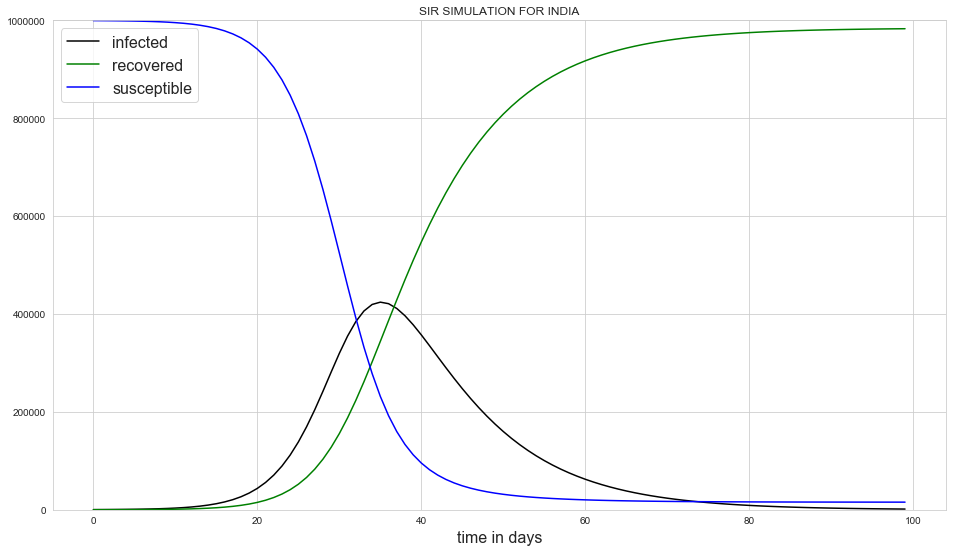

In [472]:
fig, ax1= plt.subplots(1,1)
ax1.plot(propagation_rate.index,propagation_rate.infected,label ="infected", color="k")
ax1.plot(propagation_rate.index,propagation_rate.recovered,label ="recovered", color="g")
ax1.plot(propagation_rate.index,propagation_rate.susceptible,label ="susceptible", color="b")

ax1.set_ylim(10,N0)
ax1.set_yscale("linear")
ax1.set_title("SIR SIMULATION FOR INDIA")
ax1.set_xlabel("time in days",size =16)
ax1.legend(loc= "best", prop ={"size" : 16});

In [494]:
ydata= np.array(df_analyse.Germany[41:140])
t= np.arange(len(ydata))
len(ydata)

99

In [474]:
I0 = ydata[0]
S0= N0-I0
R0 =0
beta

0.4

In [475]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t,(S0,I0,R0), t, args=(beta, gamma))[:,1]

In [476]:
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([1.88000000e+02, 2.53750146e+02, 3.42481401e+02, 4.62214660e+02,
       6.23760829e+02, 8.41683566e+02, 1.13558785e+03, 1.53183944e+03,
       2.06584976e+03, 2.78509494e+03, 3.75307323e+03, 5.05443583e+03,
       6.80153544e+03, 9.14259722e+03, 1.22715753e+04, 1.64394268e+04,
       2.19658811e+04, 2.92496151e+04, 3.87728806e+04, 5.10939571e+04,
       6.68176824e+04, 8.65319719e+04, 1.10699516e+05, 1.39503090e+05,
       1.72664004e+05, 2.09284082e+05, 2.47787600e+05, 2.86034503e+05,
       3.21620911e+05, 3.52294081e+05, 3.76342709e+05, 3.92831541e+05,
       4.01627435e+05, 4.03255033e+05, 3.98669273e+05, 3.89027720e+05,
       3.75512081e+05, 3.59213320e+05, 3.41072890e+05, 3.21864111e+05,
       3.02197997e+05, 2.82541474e+05, 2.63240152e+05, 2.44541100e+05,
       2.26613449e+05, 2.09565919e+05, 1.93461222e+05, 1.78327596e+05,
       1.64167878e+05, 1.50966559e+05, 1.38695211e+05, 1.27316626e+05,
       1.16787946e+05, 1.07063014e+05, 9.80941189e+04, 8.98332776e+04,
      

In [477]:
popt,pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))

print("standard deviation erros :" ,str(perr), "start infect :" ,ydata[0])
print("OPtimnal parameter : beta= :" ,popt[0], "and gamma :" ,popt[1])

standard deviation erros : [0.00394742 0.00336498] start infect : 188
OPtimnal parameter : beta= : 0.21116474859028836 and gamma : 0.08589853091891325


In [478]:
fitted =fit_odeint(t, *popt)

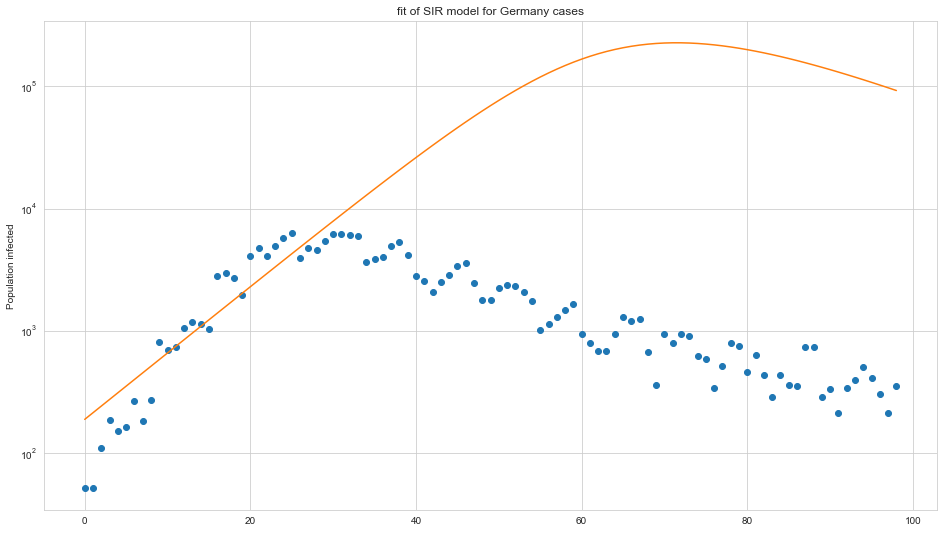

[0.21116475 0.08589853]


In [479]:
plt.semilogy(t,np.ediff1d(ydata, to_begin=ydata[1]- ydata[0]), "o")
plt.semilogy(t, fitted)
plt.title("fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.show()
print(popt)

In [480]:
t_initial= 18
t_intro_measures =20
t_hold= 21
t_relax= 21

beta_max= 0.4
beta_min =0.11
gamma =0.1

pd_beta=np.concatenate((np.array(t_initial*[beta_max]),np.linspace(beta_max,beta_min,t_intro_measures),np.array(t_hold*[beta_min]),np.linspace(beta_min,beta_max,t_relax)))

pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.38473684,
       0.36947368, 0.35421053, 0.33894737, 0.32368421, 0.30842105,
       0.29315789, 0.27789474, 0.26263158, 0.24736842, 0.23210526,
       0.21684211, 0.20157895, 0.18631579, 0.17105263, 0.15578947,
       0.14052632, 0.12526316, 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.1245    , 0.139     , 0.1535    , 0.168     , 0.1825    ,
       0.197     , 0.2115    , 0.226     , 0.2405    , 0.255     ,
       0.2695    , 0.284     , 0.2985    , 0.313     , 0.3275 

In [481]:
SIR= np.array([S0,I0,R0])
propagation_rate= pd.DataFrame(columns={"susceptible": S0, "infected": I0, "recovered": R0})

for each_beta in pd_beta:
    new_delta_vec =SIR_model(SIR, each_beta,gamma)
    SIR= SIR + new_delta_vec
    propagation_rate= propagation_rate.append({"susceptible": SIR[0], "infected": SIR[1], "recovered":SIR[2]}, ignore_index=True)

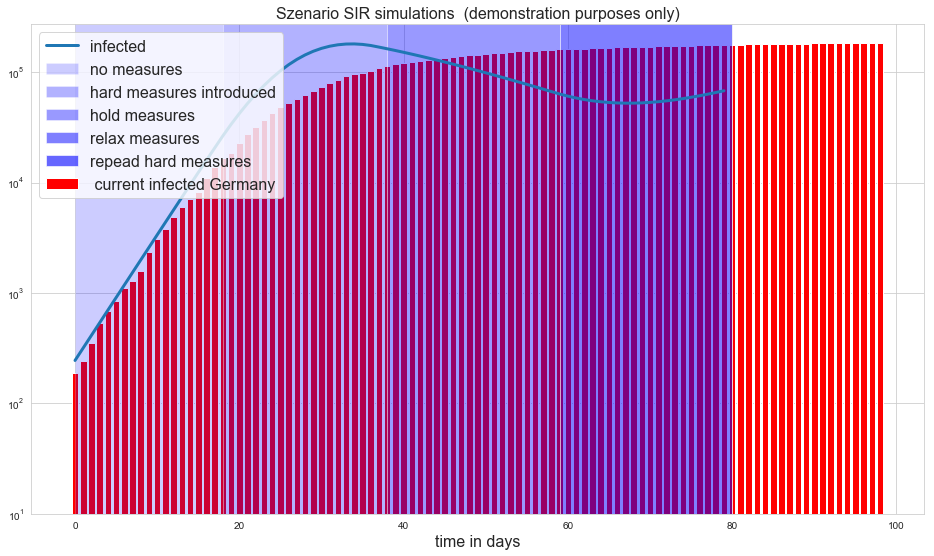

In [482]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rate.index,propagation_rate.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[:100])),ydata[:100], width=0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rate.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rate.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});



In [499]:
def slice_data(Data,con):
    ydata = np.array(Data[con][41:140])
    print(len(ydata))
    t = np.arange(len(ydata))
    N0 = 10000000
    I0 = ydata[0]
    S0 = N0 - I0
    R0 = 0

    return ydata, t , N0, S0, I0, R0

slice_data(df_analyse,"Germany")


99


(array([   188,    240,    349,    534,    684,    847,   1112,   1296,
          1567,   2369,   3062,   3795,   4838,   6012,   7156,   8198,
         10999,  13957,  16662,  18610,  22672,  27436,  31554,  36508,
         42288,  48582,  52547,  57298,  61913,  67366,  73522,  79696,
         85778,  91714,  95391,  99225, 103228, 108202, 113525, 117658,
        120479, 123016, 125098, 127584, 130450, 133830, 137439, 139897,
        141672, 143457, 145694, 148046, 150383, 152438, 154175, 155193,
        156337, 157641, 159119, 160758, 161703, 162496, 163175, 163860,
        164807, 166091, 167300, 168551, 169218, 169575, 170508, 171306,
        172239, 173152, 173772, 174355, 174697, 175210, 176007, 176752,
        177212, 177850, 178281, 178570, 179002, 179364, 179717, 180458,
        181196, 181482, 181815, 182028, 182370, 182764, 183271, 183678,
        183979, 184193, 184543], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 1

In [506]:
df_analyse = pd.read_csv(r"../data/processed/COVID_small_flat_table.csv", sep=';')
df_analyse.sort_values("date", ascending=True)[:200]
df_analyse.columns[1:]
df_analyse=df_analyse[41:140:]
df_analyse

,date,Italy,India,US,Germany
41,2020-03-03,2502,5,74,188
42,2020-03-04,3089,28,107,240
43,2020-03-05,3858,30,184,349
44,2020-03-06,4636,31,237,534
45,2020-03-07,5883,34,403,684
46,2020-03-08,7375,39,519,847
47,2020-03-09,9172,43,594,1112
48,2020-03-10,10149,56,782,1296
49,2020-03-11,12462,62,1147,1567
50,2020-03-12,15113,73,1586,2369


In [490]:
ydata= np.array(df_analyse["India"])
ydata

array([       0,        0,        0,        0,        0,        0,
              0,        0,        1,        1,        1,        2,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        5,        5,
             28,       30,       31,       34,       39,       43,
             56,       62,       73,       82,      102,      113,
            119,      142,      156,      194,      244,      330,
            396,      499,      536,      657,      727,      887,
            987,     1024,     1251,     1397,     1998,     2543,
           2567,     3082,     3588,     4778,     5311,     5916,
           6725,     7598,     8446,     9205,    10453,    11487,
          12322,    13430,    14352,    15722,    17615,    18

In [509]:
for each in df_analyse.columns[1:5]:
    print(each)

Italy
India
US
Germany
